In [51]:
import numpy as np

def cart2pol(x, y):
    rho = np.sqrt(x**2 + y**2)
    phi = np.arctan2(y, x)
    return(rho, phi)

def pol2cart(rho, phi):
    x = rho * np.cos(phi)
    y = rho * np.sin(phi)
    return(x, y)

def makePolar(image):
    polar = []
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            pol = cart2pol(i,j)
            polar.append([pol[0],pol[1],image[i,j]])

    polar = np.array(polar)
    print(polar.max(0)[0],polar.max(1)[1])
    scale_x = (image.shape[0]-1)/polar.max(0)[0]
    scale_y = (image.shape[1]-1)/polar.max(1)[1]
    #print(polar.shape)
    print (scale_x,scale_y)
    
    out = np.array(np.zeros(image.shape[0]*image.shape[1])).reshape(image.shape[0],image.shape[1])
    for pol in polar:
        x = int(pol[0]*scale_x)
        y = int(pol[1]*scale_y)
        #print(x,y)
        out[x,y] = pol[2]
    return out
        



89.09545442950498 1.5707963267948966
0.7071067811865476 40.10704565915763
(64, 64)


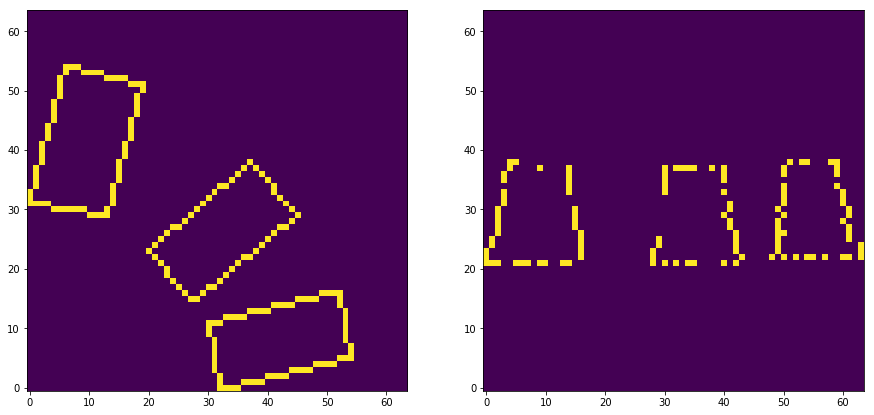

In [53]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
image=mpimg.imread('./test3.png')[:,:,3]
#print(image.shape)
#print(image)
polar = makePolar(image)
print(polar.shape)


figCar = plt.figure(figsize = (15,15))
axCar = figCar.add_subplot(1,2,1)
axCar.imshow(image)

plt.gca().invert_yaxis()

#figPol = plt.figure(figsize = (8,8))
axPol = figCar.add_subplot(1,2,2)
axPol.imshow(polar)

plt.gca().invert_yaxis()
plt.show()
